In [7]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## 데이터 읽어오기.## 데이터 읽어오기.
raw_df = pd.read_csv("../dataset/test.csv")
print(raw_df.info())
print(raw_df.head())
dataset=raw_df.copy()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       10 non-null     int64
 1   B       10 non-null     int64
 2   C       10 non-null     int64
 3   D       10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes
None
   A   B    C  D
0  1  10  100  2
1  2  20  200  2
2  3  30  300  2
3  4  40  400  2
4  5  50  500  2


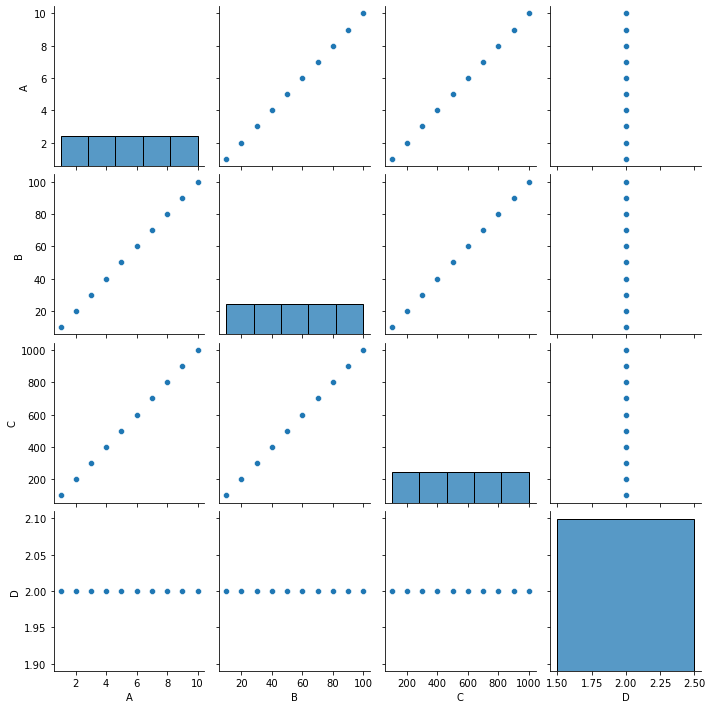

In [8]:
## 데이터 분포도 확인하기.
sns.pairplot(dataset[["A","B","C","D"]], diag_kind="kde")  ##kde
plt.show()



In [9]:
train_labels = dataset.pop("D")

## 데이터의 min , max, mean, std 값 구하기.
dataset_stats = dataset.describe()
print(dataset_stats)
dataset_stats = dataset_stats.transpose()

## data normalization
def min_max_norm(x):
  return (x - dataset_stats['min']) / (dataset_stats['max'] - dataset_stats['min'])

def standard_norm(x):
  return (x - dataset_stats['mean']) / dataset_stats['std']



              A           B            C
count  10.00000   10.000000    10.000000
mean    5.50000   55.000000   550.000000
std     3.02765   30.276504   302.765035
min     1.00000   10.000000   100.000000
25%     3.25000   32.500000   325.000000
50%     5.50000   55.000000   550.000000
75%     7.75000   77.500000   775.000000
max    10.00000  100.000000  1000.000000


In [18]:
print(dataset_stats)
print(type(dataset_stats['mean']))
print(dataset_stats['mean'].shape)
print(dataset_stats)
print(dataset)
print(dataset.shape)
print(dataset-dataset_stats['mean'])

   count   mean         std    min     25%    50%     75%     max
A   10.0    5.5    3.027650    1.0    3.25    5.5    7.75    10.0
B   10.0   55.0   30.276504   10.0   32.50   55.0   77.50   100.0
C   10.0  550.0  302.765035  100.0  325.00  550.0  775.00  1000.0
<class 'pandas.core.series.Series'>
(3,)
   count   mean         std    min     25%    50%     75%     max
A   10.0    5.5    3.027650    1.0    3.25    5.5    7.75    10.0
B   10.0   55.0   30.276504   10.0   32.50   55.0   77.50   100.0
C   10.0  550.0  302.765035  100.0  325.00  550.0  775.00  1000.0
    A    B     C
0   1   10   100
1   2   20   200
2   3   30   300
3   4   40   400
4   5   50   500
5   6   60   600
6   7   70   700
7   8   80   800
8   9   90   900
9  10  100  1000
(10, 3)
     A     B      C
0 -4.5 -45.0 -450.0
1 -3.5 -35.0 -350.0
2 -2.5 -25.0 -250.0
3 -1.5 -15.0 -150.0
4 -0.5  -5.0  -50.0
5  0.5   5.0   50.0
6  1.5  15.0  150.0
7  2.5  25.0  250.0
8  3.5  35.0  350.0
9  4.5  45.0  450.0


In [5]:
min_max_norm_train_data = min_max_norm(dataset)
standard_norm_train_data = standard_norm(dataset)

print("min max : ")
print(min_max_norm_train_data)
print("standard : ")
print(standard_norm_train_data)

min max : 
          A         B         C
0  0.000000  0.000000  0.000000
1  0.111111  0.111111  0.111111
2  0.222222  0.222222  0.222222
3  0.333333  0.333333  0.333333
4  0.444444  0.444444  0.444444
5  0.555556  0.555556  0.555556
6  0.666667  0.666667  0.666667
7  0.777778  0.777778  0.777778
8  0.888889  0.888889  0.888889
9  1.000000  1.000000  1.000000
standard : 
          A         B         C
0 -1.486301 -1.486301 -1.486301
1 -1.156012 -1.156012 -1.156012
2 -0.825723 -0.825723 -0.825723
3 -0.495434 -0.495434 -0.495434
4 -0.165145 -0.165145 -0.165145
5  0.165145  0.165145  0.165145
6  0.495434  0.495434  0.495434
7  0.825723  0.825723  0.825723
8  1.156012  1.156012  1.156012
9  1.486301  1.486301  1.486301
